# Supervised machine learning on fMRI timeseries

**General**

*Supervised learning* - predicting the target variable, given the predictor variables (labeled data) 

- *classification* - target variable consists of categories (for example automating diagnosis)
- *regression* - target variable is continous (for example predicting future)


To perform classification or regression you need labeled data. How to get labels:
- historical data with labels
- experiments to get labeled data
- crowd-sourcing labeling data

**fMRI**

In case of fMRI you need to have some labels describing the task itself (for example timing of stimuli), or subject's behaviour (for example eye motion).

Required Python libraries: scikit-learn/sklearn

-------------------------------

## Non-fMRI examples

### (1) Iris dataset

Lets start first with the Iris dataset.
- Features: petal length, petal width, sepal length, sepal width
- Species: versicolor, virginica

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris.data.shape

(150, 4)

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

#### Exploratory data analysis (EDA)


In [3]:
X = iris.data
y = iris.target

# Building dataframe with feature names
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


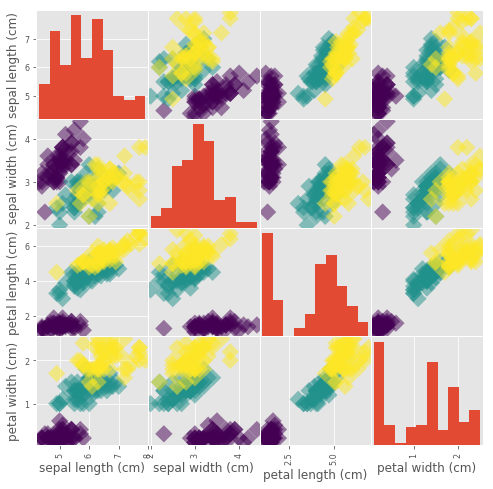

In [17]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], s=150, marker='D')

---------------------------------------------
#### **k-Nearest Neighbors (k-NN)**


**Basic idea**: predict the label of a data point by: 
- looking at the 'k' closest labeled data points
- taking a majority vote 
- creates a set of decision boundaries

![](./figures/k-nn.png)


**k-NN** requires:
- data storded as numpy arrays or pandas dataframe
- features are contineous and are in array, where each columnd is a feature
- no missing data

**Model complexity:**
- larger k = smoother decision boundary = less complex model
- smaller k = more complex model = can lead to overfitting

In [19]:
from sklearn.neighbors import KNeighborsClassifier 

# Instantiating K-NN classifier
knn = KNeighborsClassifier(n_neighbors=6)

# Applying classifier to training data (applying method .fit to classifier)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [11]:
# Predicting on unlabeled data
prediction = knn.predict(X) # you should test on the new data
prediction.shape

(150,)

#### **Measuring model performance**

**Accuracy** - commonly used metric for measuring the model performance.
- fraction of correct predictions divided by total datapoints

**Which data should be used to compute accuracy**
- How well our model perform on new data?
- Common practice: splitting data into training and test sets
- Fit/train the classifier on the training set
- Make predictions on the unlabeled test set
- Compare this predictions with the known labels

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state=21, 
                                                    stratify=y)
# stratify - keep the same proportion of labels in test and train sets


knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(y_pred)

[2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [18]:
# Test accuracy of the model
knn.score(X_test, y_test)

0.9555555555555556

---------------------------------------
### (2) Digits dataset

In [34]:
digits = datasets.load_digits()
print(digits.keys())
print(digits.images.shape)
print(digits.data.shape)

print(digits['DESCR'])

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
(1797, 8, 8)
(1797, 64)
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divid

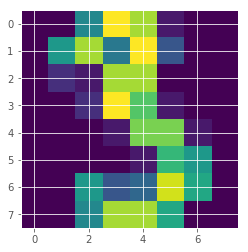

In [36]:
plt.imshow(digits['images'][3])

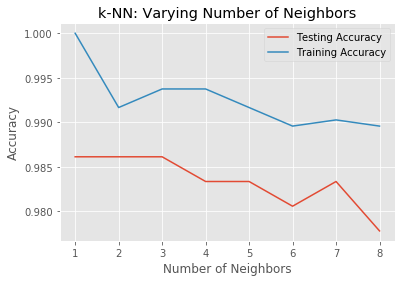

In [40]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

------------------------
## fMRI example

In this example we will try to classify the timepoint of the fMRI timeseries as one belonging to data acquired during rest or dual n-back working memory task.

In [76]:
# Load timeseries for 10 subjects
timeseries = np.load("./data/concat_10subjects_timeseries_shaefer400_pipeline-24HMP_8Phys_SpikeReg_4GS.npy", 
                     allow_pickle=True).item()

# Load task and dual n-back working memory task and rest timeseries
rest = timeseries['tasks']['rest']['timeseries']
task = timeseries['tasks']['dualnback']['timeseries']

print(rest.shape)
print(task.shape)

# Creating labels
y_rest = np.zeros(rest.shape[0])
y_task = np.ones(task.shape[0])

(3050, 400)
(3400, 400)


In [73]:
# Creating array of features representing fMRI timepoints (X) and labels (y) representing tasks: rest (0) ad working memory task (1).
X = np.concatenate((rest, task), axis=0)
y = np.concatenate((y_rest, y_task), axis=0)

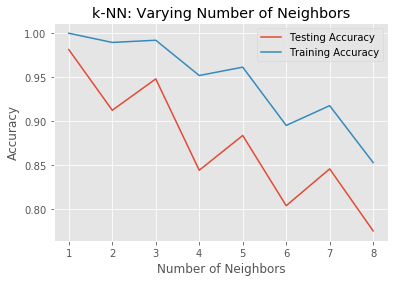

In [74]:
# Running k-NN
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

-----------------------

Useful functions:
----------------------

Pandas methods to EDA:
- `.head()`
- `.info()`
- `.describe()`
- `.drop()` - drop column from pandas dataframe

Seaborn plots:
- `sns.countplot()` - plotting counts of binary data